## Лабораторна робота № 5

**Тема:** Робота з об’єктами `Series`. Аналіз одновимірних даних у `pandas`.

**Мета роботи:** Набути практичних навичок роботи з об'єктами **`Series`** бібліотеки **`pandas`** для аналізу та маніпуляції одновимірними даними у Python, а саме:
* Створювати та ініціалізувати об'єкти `Series` різними способами (зі списків, словників, NumPy-масивів).
* Працювати з індексами, значеннями та мітками даних.
* Виконувати базові операції з об'єктами `Series`, пов’язані з індексацією, зрізами та математичними операціями.
* Застосовувати основні методи для аналізу даних: фільтрацію, сортування, агрегацію та опрацювання пропущених значень.

## Завдання I: Робота з об’єктами Series

### Вхідні дані
Супермаркет надав список солодощів та їх поточні ціни у формі словника
(ціни в гривнях):

In [1]:
sweets_prices = {
    "Ferrero Rocher": 150,
    "Lindt Excellence": 120,
    "Raffaello": 130,
    "KitKat": 25,
    "M&M's": 40,
    "Snickers": 20,
    "Milka": 35,
    "Twix": 22,
    "Toblerone": 80,
    "Skittles": 30,
    "Kinder Chocolate": 45,
    "Mars": 20,
    "Hershey's": 60,
    "Bounty": 22,
    "Nestlé Aero": 50
}

**1) Створити об'єкт `Series` "sweets" використовуючи дані словника "sweets_prices".**
- Ціни повинні бути подані у форматі `float`.
- Вивести об'єкт `Series` "sweets" командою `print()`

In [2]:
import pandas as pd

prices_series = pd.Series(sweets_prices, dtype=float)

print(prices_series)

Ferrero Rocher      150.0
Lindt Excellence    120.0
Raffaello           130.0
KitKat               25.0
M&M's                40.0
Snickers             20.0
Milka                35.0
Twix                 22.0
Toblerone            80.0
Skittles             30.0
Kinder Chocolate     45.0
Mars                 20.0
Hershey's            60.0
Bounty               22.0
Nestlé Aero          50.0
dtype: float64


**2) Збільшити вартість усіх солодощів на 10% без використання циклу, застосувавши відповідні математичні оператори.**
- Вивести модифікований об'єкт `Series` "sweets" командою `print()`

In [3]:
prices_series *= 1.1

print(prices_series)

Ferrero Rocher      165.0
Lindt Excellence    132.0
Raffaello           143.0
KitKat               27.5
M&M's                44.0
Snickers             22.0
Milka                38.5
Twix                 24.2
Toblerone            88.0
Skittles             33.0
Kinder Chocolate     49.5
Mars                 22.0
Hershey's            66.0
Bounty               24.2
Nestlé Aero          55.0
dtype: float64


**3) Збільшити на 20% ціни на солодощі, вартість яких знаходиться в межах від 20 до 70 грн (без використання циклу).**
- Вивести модифікований об'єкт `Series` "sweets" командою `print()`

In [4]:
prices_series.loc[(prices_series >= 20) & (prices_series <= 70)] *= 1.20

print(prices_series)

Ferrero Rocher      165.00
Lindt Excellence    132.00
Raffaello           143.00
KitKat               33.00
M&M's                52.80
Snickers             26.40
Milka                46.20
Twix                 29.04
Toblerone            88.00
Skittles             39.60
Kinder Chocolate     59.40
Mars                 26.40
Hershey's            79.20
Bounty               29.04
Nestlé Aero          66.00
dtype: float64


**4) Збільшити ціну "Snickers" на 100 грн**
- Вивести командою `print()` рядок з міткою індексу "Snickers" з попереднім та модифікованим значенням.

In [5]:
print(f"Snicker price: {prices_series[["Snickers"]]}")

prices_series.loc["Snickers"] += 100

print(f"Updated snicker price: {prices_series[["Snickers"]]}")

Snicker price: Snickers    26.4
dtype: float64
Updated snicker price: Snickers    126.4
dtype: float64


**5) Зберегти у новому об'єкті Series "top_seven" 7 найдорожчих товарів не використовуючи сортування даних та цикли.**
- Вивести об'єкт `Series` "top_seven" командою `print()`

In [6]:
top_seven = prices_series.nlargest(7)
print(top_seven)

Ferrero Rocher      165.0
Raffaello           143.0
Lindt Excellence    132.0
Snickers            126.4
Toblerone            88.0
Hershey's            79.2
Nestlé Aero          66.0
dtype: float64


**6) Аналіз продажів топ-7 продуктів**
- Дано інформацію про обсяг продажів топ-7 продуктів станом на понеділок (`monday_sale`) та вівторок (`tuesday_sale`).
- Ціни за одиницю продукції зберігаються у `top_seven`.
- Створити об'єкт `Series "sale"` з сумарними грошовими надходженнями за два дні.

In [7]:
monday_sale = pd.Series(data = [2, 4, 13, 7, 9]
                        ,index = ["Ferrero Rocher", "Snickers", "Nestlé Aero",
                                  "Raffaello", "Toblerone"])
tuesday_sale = pd.Series(data = [12, 3, 5, 17]
                         ,index = ["Hershey's", "Snickers", "Ferrero Rocher", "Raffaello"])

In [8]:
print("\t\tmonday_sale:")
print(monday_sale)
print("\n"+ "-"*24)
print("\t\ttuesday_sale:")
print(tuesday_sale)
print("\n"+ "-"*24)

common_index = top_seven.index

monday_aligned = monday_sale.reindex(common_index, fill_value=0)
tuesday_aligned = tuesday_sale.reindex(common_index, fill_value=0)

sale = (monday_aligned + tuesday_aligned)
print("\t\tsale:")
print(sale)

		monday_sale:
Ferrero Rocher     2
Snickers           4
Nestlé Aero       13
Raffaello          7
Toblerone          9
dtype: int64

------------------------
		tuesday_sale:
Hershey's         12
Snickers           3
Ferrero Rocher     5
Raffaello         17
dtype: int64

------------------------
		sale:
Ferrero Rocher       7
Raffaello           24
Lindt Excellence     0
Snickers             7
Toblerone            9
Hershey's           12
Nestlé Aero         13
dtype: int64


**7) Розрахунок доходу від реалізації**
- Створити об'єкт `Series` "income" з доходом від реалізації кожного продукту.
- Вивести об'єкт "income" та сумарний дохід командою `print()`.

In [9]:
print("\t\tincome:")
income = sale * top_seven
print(income)

total_income = income.sum()
print(f"total_income: {total_income:.2f}")

		income:
Ferrero Rocher      1155.0
Raffaello           3432.0
Lindt Excellence       0.0
Snickers             884.8
Toblerone            792.0
Hershey's            950.4
Nestlé Aero          858.0
dtype: float64
total_income: 8072.20


## Завдання II: Загрузка та обробка даних із csv файлу.

**1) Завантажити CSV файл "revolutionary_war.csv" в об'єкт "battles"**
- Вивести об'єкт "battles" та його тип через `print()`

In [10]:
battles = pd.read_csv("csv_files/revolutionary_war.csv")
print(battles)
print(f"battles type = {type(battles)}")

                                Battle  Start Date          State
0                         Powder Alarm    9/1/1774  Massachusetts
1    Storming of Fort William and Mary  12/14/1774  New Hampshire
2     Battles of Lexington and Concord   4/19/1775  Massachusetts
3                      Siege of Boston   4/19/1775  Massachusetts
4                   Gunpowder Incident   4/20/1775       Virginia
..                                 ...         ...            ...
227                Siege of Fort Henry   9/11/1782       Virginia
228         Grand Assault on Gibraltar   9/13/1782            NaN
229          Action of 18 October 1782  10/18/1782            NaN
230          Action of 6 December 1782   12/6/1782            NaN
231          Action of 22 January 1783   1/22/1783       Virginia

[232 rows x 3 columns]
battles type = <class 'pandas.core.frame.DataFrame'>


**2) Модифікувати завантаження даних з файлу "revolutionary_war.csv"**
- Обмежити стовпчики: "Start Date" та "State"
- Перетворити "Start Date" на індекс з типом даних `datetime`
- Переконатись, що об'єкт "battles" є `Series` (а не `DataFrame`)

**Вивести:**
- об'єкт "battles"
- тип об'єкта "battles"
- тип індексу "battles"

In [11]:
df = pd.read_csv("csv_files/revolutionary_war.csv", usecols=["Start Date", "State"])

df["Start Date"] = pd.to_datetime(df["Start Date"])
df.set_index("Start Date", inplace=True)

battles = df.squeeze()
print(battles)
print(f"battle type: {type(battles)}")
print(f"battle label type: {type(battles.index)}")

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object
battle type: <class 'pandas.core.series.Series'>
battle label type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


**3) Вияснити в яких трьох штатах відбулося найбільше битв.**

In [12]:
state_counts = battles.dropna().value_counts()

top_three_states = state_counts.nlargest(3)
print(top_three_states)

State
South Carolina    31
New York          28
New Jersey        24
Name: count, dtype: int64


**4) Визначити, яку частку боїв покривають перші три штати з
найбільшою кількістю збройних протистоянь.**
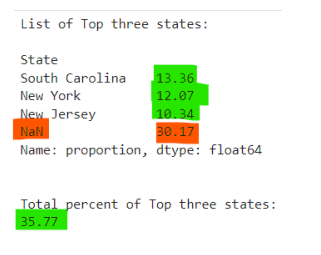

In [15]:
counts = (df['State'].value_counts(dropna=False, normalize=True) * 100).round(2)

top_3_states = counts[counts.index.notna()].head(3)
nan_value = counts[counts.index.isna()]

result = pd.concat([top_3_states, nan_value])
print(result)

total_percent_in_three_states = top_3_states.sum().round(2)
print(f"\nTotal percent of 3 states: {total_percent_in_three_states}%")


State
South Carolina    13.36
New York          12.07
New Jersey        10.34
NaN               30.17
Name: proportion, dtype: float64

Total percent of 3 states: 35.77%


**5) Визначити період найактивніших бойових дій, розділивши всі дані в датасеті на три періоди.**

Вивести за допомогою функції `print()`:
- Згруповані дані битв по періодах відсортовані в порядку зростання дат.
- Період найінтенсивніших бойових дій.

In [14]:
df = pd.read_csv("csv_files/revolutionary_war.csv", usecols=["Start Date", "State"])
df["Start Date"] = pd.to_datetime(df["Start Date"])
df.set_index("Start Date", inplace=True)
battles = df.squeeze()

# periods = pd.cut(battles.index, bins=3, precision=0)
# war_periods = periods.value_counts().sort_index()
war_periods = (battles.index
               .to_series()
               .value_counts(bins=3)
               .sort_index())

print("war periods:")
print(war_periods)

print("\nThe most intense war period:")
print(war_periods.nlargest(1))

war periods:
(1774-08-28 22:26:23.999999999, 1777-06-18 16:00:00]     47
(1777-06-18 16:00:00, 1780-04-05 08:00:00]               81
(1780-04-05 08:00:00, 1783-01-22 00:00:00]              100
Name: count, dtype: int64

The most intense war period:
(1780-04-05 08:00:00, 1783-01-22 00:00:00]    100
Name: count, dtype: int64
